In [38]:
import pandas as pd
import numpy as np
from expected_cost.utils import plot_hists
from scipy.special import log_softmax, logsumexp, softmax
import torch

In [39]:
sd = torch.load('../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3_1/last.ckpt')
sd

/tmp/ipykernel_759777/3907412914.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load('../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3_1/last.ckpt'

array([<Axes: title={'center': 'Scores from col 0'}>,
       <Axes: title={'center': 'Scores from col 1'}>], dtype=object)

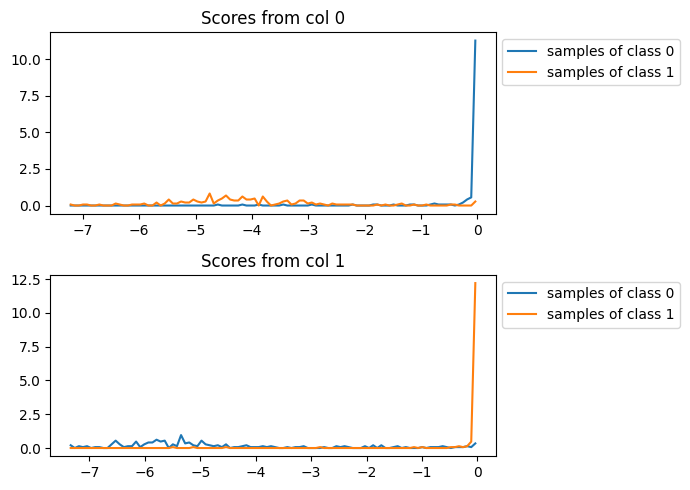

In [31]:
logits = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_norm-5/sst2_1024_0.3_1/test=sst2/list=test_400/logits.csv', index_col=0, header=0).values.astype(float)
logits = log_softmax(logits, axis=1)
labels = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_norm-5/sst2_1024_0.3_1/test=sst2/list=test_400/labels.csv', index_col=0, header=0).values.flatten().astype(int)
plot_hists(labels, logits, group_by='score')

In [35]:
-logits[np.arange(len(labels)), labels].mean()

0.15964169669249056

array([<Axes: title={'center': 'Scores from col 0'}>,
       <Axes: title={'center': 'Scores from col 1'}>], dtype=object)

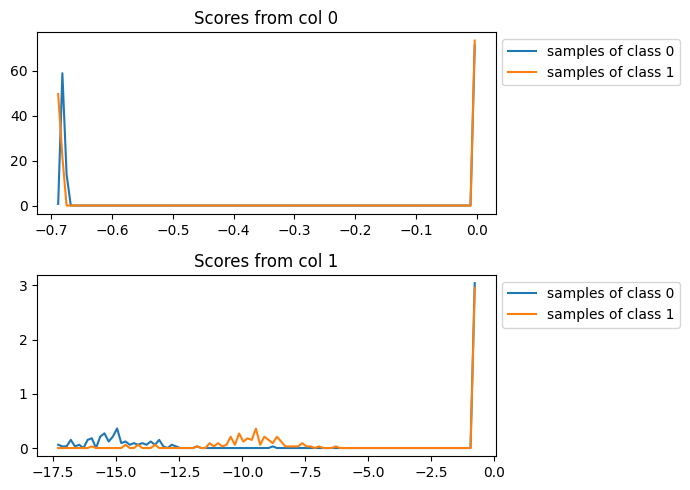

In [36]:
logits = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3_1/test=sst2/list=test_400/logits.csv', index_col=0, header=0).values.astype(float)
# logits = log_softmax(logits, axis=1)
labels = pd.read_csv('../outputs/adaptation/llama3.2-1b/lora_norm-5_plus_dp_cal/sst2_1024_0.3_1/test=sst2/list=test_400/labels.csv', index_col=0, header=0).values.flatten().astype(int)
plot_hists(labels, logits, group_by='score')

In [37]:
-logits[np.arange(len(labels)), labels].mean()

2.839874681824766